In [79]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import PandasTools
import glob2
sys.path.append('/Users/kate_fieseler/PycharmProjects/syndirella')
from syndirella.slipper._placement_data import make_fragmenstein_placements_csv

In [80]:
output_path = '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/amidation_scaffolds_90_placed'
output_dir = '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/amidation_scaffolds_90_placed'
make_fragmenstein_placements_csv(output_path, output_dir)

'/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/amidation_scaffolds_90_placed/fragmenstein_placements.csv'

In [81]:
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/amidation_scaffolds_90_placed/fragmenstein_placements.csv')
df

,name,ΔΔG,ΔG_bound,ΔG_unbound,comRMSD
0,matteo-reactants-aug-2024-35,0.0,-429.444676,-429.444676,1.252648
1,matteo-reactants-aug-2024-35,inf,inf,inf,inf
2,matteo-reactants-aug-2024-32,0.0,-427.661601,-427.661601,0.832635
3,matteo-reactants-aug-2024-32,inf,inf,inf,inf
4,matteo-reactants-aug-2024-66,0.0,-429.863076,-429.863076,1.048359
...,...,...,...,...,...
175,matteo-reactants-aug-2024-47,0.0,-428.517015,-428.517015,0.804063
176,matteo-reactants-aug-2024-4,inf,inf,inf,inf
177,matteo-reactants-aug-2024-4,0.0,-428.131118,-428.131118,0.744406
178,matteo-reactants-aug-2024-40,inf,inf,inf,inf


In [82]:
# remove rows that contain any inf values
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df

,name,ΔΔG,ΔG_bound,ΔG_unbound,comRMSD
0,matteo-reactants-aug-2024-35,0.00000,-429.444676,-429.444676,1.252648
2,matteo-reactants-aug-2024-32,0.00000,-427.661601,-427.661601,0.832635
4,matteo-reactants-aug-2024-66,0.00000,-429.863076,-429.863076,1.048359
7,matteo-reactants-aug-2024-59,0.00000,-429.830796,-429.830796,0.856666
8,matteo-reactants-aug-2024-61,0.00000,-428.419802,-428.419802,0.801198
...,...,...,...,...,...
171,matteo-reactants-aug-2024-3,-0.44557,-416.610810,-417.056380,1.256718
172,matteo-reactants-aug-2024-78,0.00000,-431.399260,-431.399260,0.868415
175,matteo-reactants-aug-2024-47,0.00000,-428.517015,-428.517015,0.804063
177,matteo-reactants-aug-2024-4,0.00000,-428.131118,-428.131118,0.744406


In [83]:
df['ΔΔG'].value_counts()

ΔΔG
 0.000000    62
-0.555803     1
-0.980626     1
-0.009404     1
-0.602053     1
-1.046954     1
-0.303289     1
-1.060964     1
-0.711998     1
-0.762424     1
-0.950875     1
-1.182486     1
-1.677871     1
-0.430034     1
-2.285291     1
-1.649409     1
-0.320050     1
-0.313695     1
-1.043141     1
-0.131568     1
-1.505358     1
-1.600113     1
-0.238130     1
-1.894042     1
-1.187559     1
-0.243902     1
-1.212194     1
-1.264214     1
-0.445570     1
Name: count, dtype: int64

In [84]:
df = df[df['ΔΔG'] < 0]
df

,name,ΔΔG,ΔG_bound,ΔG_unbound,comRMSD
14,matteo-reactants-aug-2024-50,-1.649409,-424.318027,-425.967436,1.253810
18,matteo-reactants-aug-2024-34,-1.264214,-428.151164,-429.415378,0.749095
20,matteo-reactants-aug-2024-51,-1.212194,-424.943457,-426.155651,2.257307
25,matteo-reactants-aug-2024-69,-0.243902,-429.952322,-430.196224,1.178749
30,matteo-reactants-aug-2024-58,-1.187559,-420.333511,-421.521071,2.284595
36,matteo-reactants-aug-2024-6,-1.894042,-416.303940,-418.197981,0.847376
39,matteo-reactants-aug-2024-89,-0.238130,-419.314098,-419.552227,1.182082
46,matteo-reactants-aug-2024-73,-1.600113,-421.669045,-423.269158,1.044677
52,matteo-reactants-aug-2024-27,-1.505358,-433.264182,-434.769540,1.149574
69,matteo-reactants-aug-2024-72,-0.131568,-420.956144,-421.087712,1.633123


(0.0, 3.0)

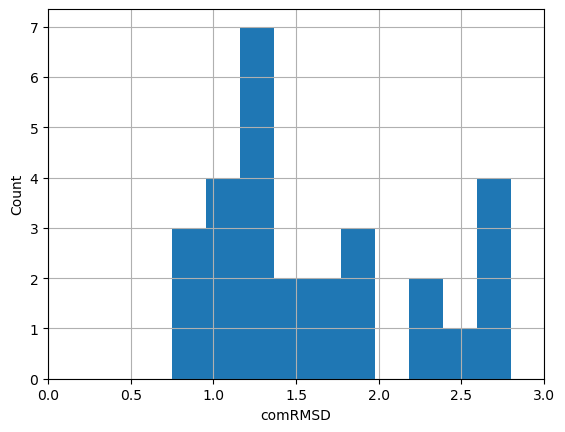

In [85]:
df['comRMSD'].hist()
plt.xlabel('comRMSD')
plt.ylabel('Count')
plt.xlim(0, 3)

In [86]:
# make SDF
mols = glob2.glob('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/amidation_scaffolds_90_placed/*/*.minimised.mol')
keep = df['name'].values
mols = [mol for mol in mols if mol.split('/')[-2] in keep]
assert len(mols) == len(df)

In [87]:
# make SDF
w = Chem.SDWriter('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/amidation_scaffolds_90_placed/amidation_scaffolds_negative_ddG_28.sdf')
for mol in mols:
    m = Chem.MolFromMolFile(mol)
    m.SetProp('_Name', mol.split('/')[-1].split('.')[0])
    w.write(m)
w.close()

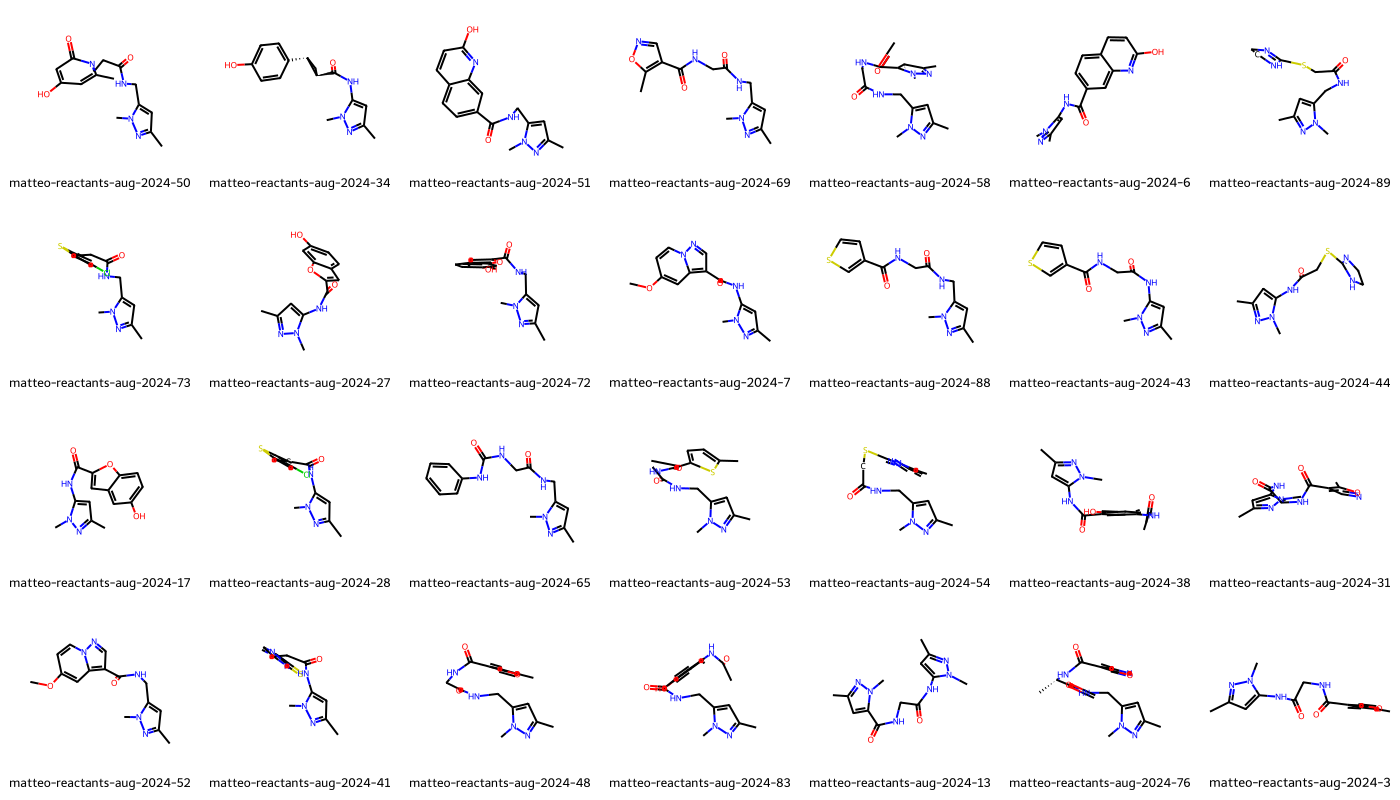

In [93]:
df = PandasTools.LoadSDF('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/designs/amidation_scaffolds_90_placed/amidation_scaffolds_negative_ddG_28.sdf')
PandasTools.FrameToGridImage(df, legendsCol='ID', molsPerRow=7)